<a href="https://colab.research.google.com/github/bellottisofia/Innovation_Adoption_Parameters/blob/main/matrix_DAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
df = pd.read_excel('/content/dataset_clean.xlsx')

In [3]:
km_mapping = {
    "I don't know":np.nan,
    'Less than 10 km': 'Less than 10 km',

    '10-19 km': '10-19 km'  ,
    '20-29 km': '20-29 km' ,

     '30-39 km' : '30-49 km',
    '40-49 km' : '30-49 km',

    '50-99 km' :'more than 50' ,
     '100-199 km': 'more than 50',

    '200 km or more': 'more than 50'
}




In [4]:
df['km_day'] = df['Q8'].map(km_mapping)
df.drop(columns=['Q8'], inplace=True)
df.dropna(inplace=True)

In [5]:
for col in df.columns:
    print(f"Column '{col}': {df[col].unique()}")

Column 'Q11_1': [0 1]
Column 'Q11_2': [0 1]
Column 'Q11_3': [0 1]
Column 'Q11_4': [1 0]
Column 'Q11_5': [1 0]
Column 'Q11_6': [0 1]
Column 'Q11_7': [0 1]
Column 'Q11_8': [1 0]
Column 'Q11_9': [0 1]
Column 'Q11_10': [0 1]
Column 'Q11_11': [1 0]
Column 'Q11_12': [0 1]
Column 'Q11_13': [0 1]
Column 'Q12_1': [0 1]
Column 'Q12_2': [0 1]
Column 'Q12_3': [1 0]
Column 'Q12_4': [1 0]
Column 'Q12_5': [0 1]
Column 'Q12_6': [0 1]
Column 'Q12_7': [0 1]
Column 'Q12_8': [1 0]
Column 'Q12_9': [0 1]
Column 'Q12_10': [0 1]
Column 'Q12_11': [1 0]
Column 'Q12_12': [0 1]
Column 'Q12_13': [0 1]
Column 'Q12_14': [0 1]
Column 'Q13_1': [0 1]
Column 'Q13_2': [0 1]
Column 'Q13_3': [1 0]
Column 'Q13_4': [0 1]
Column 'Q13_5': [1 0]
Column 'Q13_6': [0 1]
Column 'Q13_7': [0 1]
Column 'Q13_8': [0 1]
Column 'Q13_9': [1 0]
Column 'Q13_10': [0 1]
Column 'Q13_11': [0 1]
Column 'Q13_12': [0 1]
Column 'Q13_13': [1 0]
Column 'Q13_14': [1 0]
Column 'Q13_15': [0 1]
Column 'Q16': [       1 99999997        2        3]
Column 'Q

Responses such as 'Don't Know' or 'Neither/nor' were initially coded with very high numerical values, which could potentially distort the analysis. To mitigate this effect, these responses were recoded as neutral answers, assigning them a value of 3 (`Neutral').

In [6]:
df.replace(99999997, 3, inplace=True)

In [7]:
for col in df.columns:
    print(f"Column '{col}': {df[col].unique()}")

Column 'Q11_1': [0 1]
Column 'Q11_2': [0 1]
Column 'Q11_3': [0 1]
Column 'Q11_4': [1 0]
Column 'Q11_5': [1 0]
Column 'Q11_6': [0 1]
Column 'Q11_7': [0 1]
Column 'Q11_8': [1 0]
Column 'Q11_9': [0 1]
Column 'Q11_10': [0 1]
Column 'Q11_11': [1 0]
Column 'Q11_12': [0 1]
Column 'Q11_13': [0 1]
Column 'Q12_1': [0 1]
Column 'Q12_2': [0 1]
Column 'Q12_3': [1 0]
Column 'Q12_4': [1 0]
Column 'Q12_5': [0 1]
Column 'Q12_6': [0 1]
Column 'Q12_7': [0 1]
Column 'Q12_8': [1 0]
Column 'Q12_9': [0 1]
Column 'Q12_10': [0 1]
Column 'Q12_11': [1 0]
Column 'Q12_12': [0 1]
Column 'Q12_13': [0 1]
Column 'Q12_14': [0 1]
Column 'Q13_1': [0 1]
Column 'Q13_2': [0 1]
Column 'Q13_3': [1 0]
Column 'Q13_4': [0 1]
Column 'Q13_5': [1 0]
Column 'Q13_6': [0 1]
Column 'Q13_7': [0 1]
Column 'Q13_8': [0 1]
Column 'Q13_9': [1 0]
Column 'Q13_10': [0 1]
Column 'Q13_11': [0 1]
Column 'Q13_12': [0 1]
Column 'Q13_13': [1 0]
Column 'Q13_14': [1 0]
Column 'Q13_15': [0 1]
Column 'Q16': [1 3 2]
Column 'Q17': [3 1 2 4 5]
Column 'Q18_1

We consider the following questions:

Q20: how your opinion about diesel and gasoline motor is changed : 1 more positive 5 more negative

Q21: how your opinion about EV is changed : 1 more positive 5 more negative

Q17: If you only had an electric car, how well would it suit your daily driving?
Very good 1 to Very bad 5







To ensure consistency in data interpretation, we standardize the response scales such that a value of 5 always corresponds to a favorable opinion towards electric vehicles. Consequently, we reverse the scale for questions Q17 and Q21.


In [8]:
df['Q17'] = 5- df['Q17']
df['Q21'] = 5- df['Q21']

In [9]:
df_Germany=df.loc[df['Country']=='Germany']

In [10]:
countries = [ df_Germany]
order_km = ['Less than 10 km', '10-19 km', '20-29 km', '30-49 km', 'more than 50']
for country in countries:
  country['km_day'] = pd.Categorical(country['km_day'], categories=order_km, ordered=True)

<ipython-input-10-a452ccee02da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['km_day'] = pd.Categorical(country['km_day'], categories=order_km, ordered=True)


<ipython-input-13-80290366cc07>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_Germany = df_Germany.groupby(['Lftcat', 'km_day']).size().unstack(fill_value=0)
<ipython-input-13-80290366cc07>:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


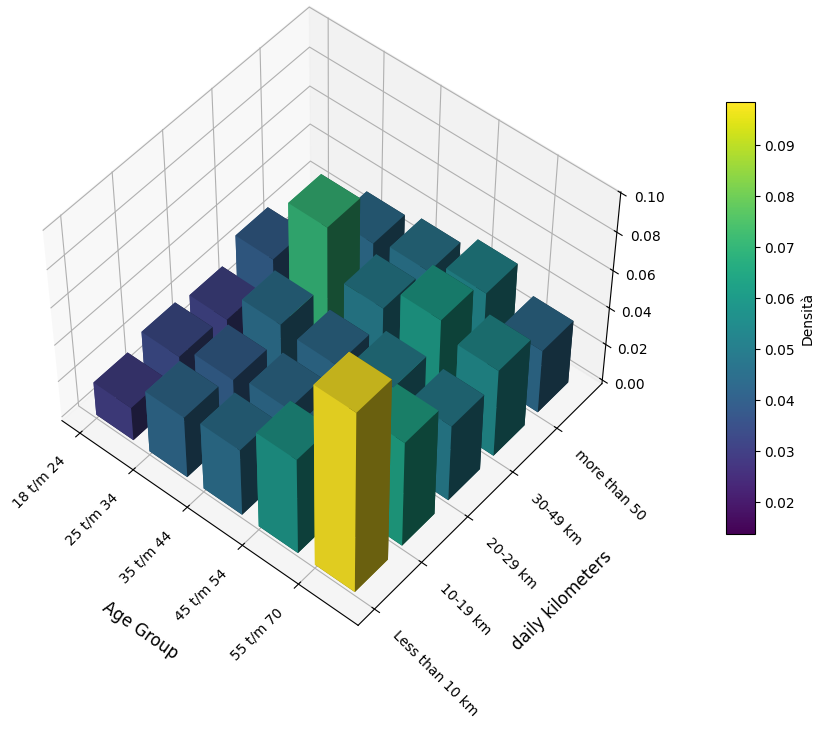

In [13]:

grouped_matrix_Germany = df_Germany.groupby(['Lftcat', 'km_day']).size().unstack(fill_value=0)

Z = grouped_matrix_Germany.values.astype(float)
Z = Z / Z.sum()

xpos, ypos = np.meshgrid(np.arange(Z.shape[0]), np.arange(Z.shape[1]), indexing="xy")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)
dz = Z.T.ravel()

colors = cm.viridis(dz / dz.max())

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=50, azim=-50)

ax.bar3d(xpos, ypos, zpos, dx=0.7, dy=0.7, dz=dz, color=colors, zsort='average')


ax.set_xticks(np.arange(Z.shape[0]))
ax.set_xticklabels(grouped_matrix_Germany.index, rotation=45, ha='right', fontsize=10)

ax.set_yticks(np.arange(Z.shape[1]))
ax.set_yticklabels(grouped_matrix_Germany.columns,  rotation=-45,  ha='left',fontsize=10)

ax.set_xlabel('Age Group', labelpad=40, fontsize=12)
ax.set_ylabel('daily kilometers', labelpad=40, fontsize=12)

mappable = cm.ScalarMappable(cmap='viridis')
mappable.set_array(dz)
fig.colorbar(mappable, ax=ax, shrink=0.7, aspect=15, pad=0.1, label='Densità')

plt.tight_layout()
plt.show()


In [14]:


grouped_fractions_Germany = df_Germany.groupby(['Lftcat', 'km_day']).size() / len(df_Germany)

grouped_fractions_Germany

<ipython-input-14-7dfd111f607c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_fractions_Germany = df_Germany.groupby(['Lftcat', 'km_day']).size() / len(df_Germany)


Lftcat     km_day         
18 t/m 24  Less than 10 km    0.018222
           10-19 km           0.022595
           20-29 km           0.019679
           30-49 km           0.029883
           more than 50       0.013848
25 t/m 34  Less than 10 km    0.033528
           10-19 km           0.029883
           20-29 km           0.036443
           30-49 km           0.065598
           more than 50       0.034985
35 t/m 44  Less than 10 km    0.036443
           10-19 km           0.034257
           20-29 km           0.034257
           30-49 km           0.041545
           more than 50       0.038630
45 t/m 54  Less than 10 km    0.052478
           10-19 km           0.035714
           20-29 km           0.042274
           30-49 km           0.054665
           more than 50       0.045918
55 t/m 70  Less than 10 km    0.098397
           10-19 km           0.057580
           20-29 km           0.041545
           30-49 km           0.047376
           more than 50       0.034257
dtype: float64

In [15]:

columns_to_average = [col for col in df_Germany.columns if col.startswith(('Q11_', 'Q12_', 'Q13_', 'Q17', 'Q18_', 'Q20', 'Q21'))]

grouped_matrix_Germany = df_Germany.groupby(['Lftcat', 'km_day'])[columns_to_average].mean()
grouped_matrix_Germany['population'] = grouped_matrix_Germany.index.get_level_values('Lftcat') + '_' + grouped_matrix_Germany.index.get_level_values('km_day').astype(str)

matrix_Germany = grouped_matrix_Germany.reset_index(drop=True)
matrix_Germany = matrix_Germany[['population'] + [col for col in matrix_Germany.columns if col != 'population']]


<ipython-input-15-f5024e31c5df>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_Germany = df_Germany.groupby(['Lftcat', 'km_day'])[columns_to_average].mean()


In [17]:

columns_to_rescale = [col for col in df.columns if col.startswith(( 'Q17', 'Q18_', 'Q20', 'Q21'))]
for column in columns_to_rescale:
  matrix_Germany[column] = (matrix_Germany[column] - 1) / 4
matrix_Germany.to_csv("matrix_Germany.csv", index=False)